In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv("Fraud.csv")


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
## check null value 

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
## check  duplicate value
df[df.duplicated(keep=False)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [13]:
correct = len(df[df['isFraud'] == 0]) 
fraud = len(df[df['isFraud'] == 1])
correct_per = (correct / ( fraud +  correct)) * 100
fraud_per = (fraud / ( fraud +  correct)) * 100


print(fraud_per)
print(correct_per)

### this shows that it is Imbalance dataset 

0.12908204481801522
99.87091795518198


Text(0.5, 1.0, 'Visualization of Labels')

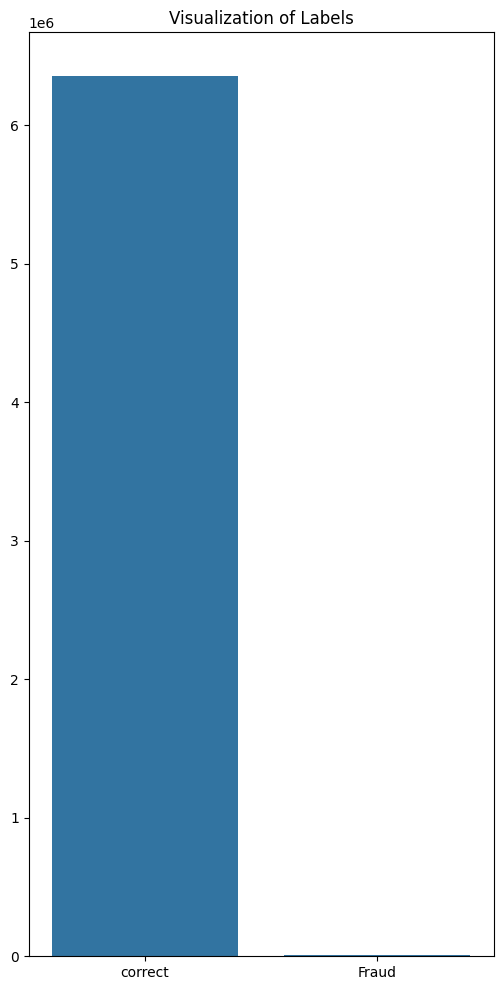

In [16]:
import seaborn  as sns

labels = ["correct", "Fraud"]
count_classes = df['isFraud'].value_counts().sort_index()
plt.figure(figsize=(6,12))
sns.barplot(x=labels, y=count_classes.values)
plt.title("Visualization of Labels")


<Axes: >

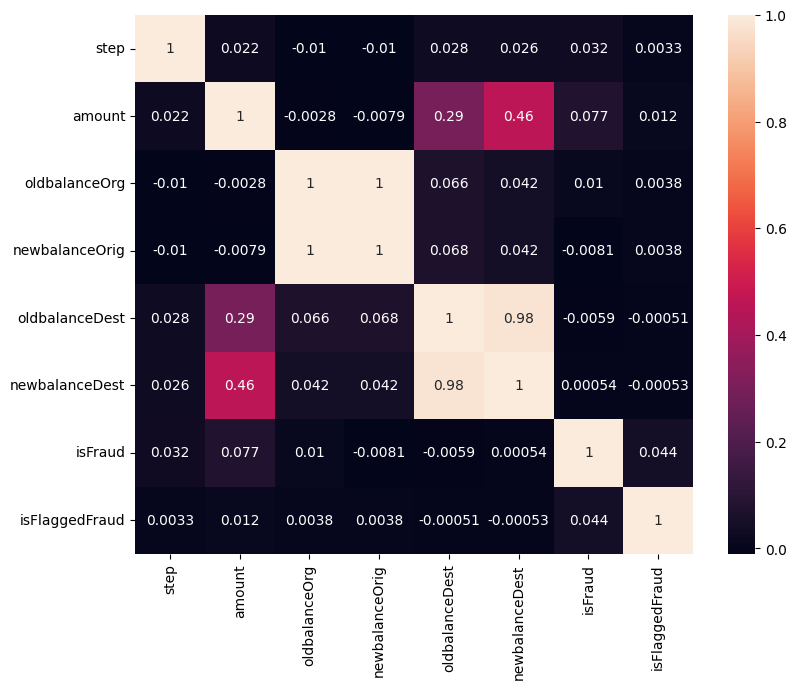

In [17]:
### Correlation heatmap
import seaborn  as sns

corr=df.corr(numeric_only=True)
plt.figure(figsize=(9,7))
sns.heatmap(corr,annot=True)

In [18]:
data = df.copy()
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
cat_features = data.select_dtypes(include="object").columns
num_features = data.select_dtypes(exclude="object").columns

In [20]:
## Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_features:
    data[i] = le.fit_transform(data[i].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [21]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [22]:
## Feature selection

# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(data)


,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [23]:
### dropping the highly variance  and unnecessary col

data= data.drop(['oldbalanceOrg' ,'newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)
data

,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,3,9839.64,757869,1662094,0,0
1,3,1864.28,2188998,1733924,0,0
2,4,181.00,1002156,439685,1,0
3,1,181.00,5828262,391696,1,0
4,3,11668.14,3445981,828919,0,0
...,...,...,...,...,...,...
6362615,1,339682.13,5651847,505863,1,0
6362616,4,6311409.28,1737278,260949,1,0
6362617,1,6311409.28,533958,108224,1,0
6362618,4,850002.52,2252932,319713,1,0


In [24]:
calc_vif(data)

,variables,VIF
0,type,3.782278
1,amount,1.174794
2,nameOrig,1.927201
3,nameDest,3.185881
4,isFraud,1.009814
5,isFlaggedFraud,1.002029


<Axes: >

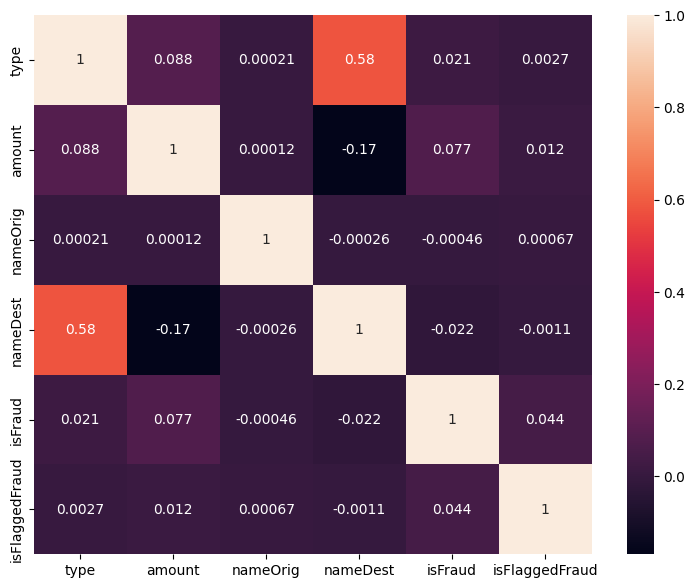

In [25]:

corr=data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr,annot=True)

In [26]:
### model building

X = data.drop(["isFraud"], axis= 1)
Y = data["isFraud"]

In [27]:
## train-test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape



((5090096, 5), (1272524, 5))

In [28]:
###  Feature Scaling Or Standardization
#Feature scaling or standardization is a technique used to normalize the features of a dataset. 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [33]:
### model training 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix 



In [34]:
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

    ### train model 
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)        

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) # Calculate Roc
    model_train_classification_report = classification_report(y_train, y_train_pred)
    model_train_confusion_matrix = confusion_matrix(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    model_test_classification_report = classification_report(y_test, y_test_pred)
    model_test_confusion_matrix = confusion_matrix(y_test, y_test_pred)


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('- Classification Report:\n {}'.format(model_train_classification_report))
    print('- Confusion Matrix:\n {}'.format(model_train_confusion_matrix))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print('- Classification Report:\n {}'.format(model_test_classification_report))
    print('- Confusion Matrix:\n {}'.format(model_test_confusion_matrix))

    
    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      1.00      1.00      6593

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096

- Confusion Matrix:
 [[5083503       0]
 [      0    6593]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.1385
- Recall: 0.1469
- Roc Auc Score: 0.5729
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.14      0.15      0.14      1620

    accuracy                           1.00   1272524
   macro avg       0.57      0

In [ ]:
### Conclusion 

I have used Random Forest and Decision tree model because data is highly unbalanced. 

Random forest makes multiple decision trees which makes it easier but time taking  for model to understand the data in a simpler way.

Decision Tree makes decisions in a boolean way while other like -  Logistic regression  , XGBoost , may give good Accuracy but did not give good precision and recall value. 


How did you select variables to be included in the model?
-  by using VIF values and correlation heatmap  we can select the best feature and if they are highly correlated to each other and then we will drop the column .


What are the key factors that predict fraudulent customer? 
-	check the name of organisation asking money is legal or not  . 
-	Transaction history of vendors. 

What kind of prevention should be adopted while company update its infrastructure?

-	update the security software on your mobile devices and laptops.
-	Use only verified applications. 
-	Avoid responding to spam calls, SMS, or emails .
-	browse only through secure websites.

Assuming these actions have been implemented, how would you determine if they work?
-	Check the receipt of E-statements from your bank .
-	Check the detail  log of all payments made .




